In [1]:
# import dependencies


# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import time
from scipy import stats
from scipy.stats import linregress
from datetime import datetime
import calendar




## Topic 2: Reported Staff Shortages from 2020 to 2022 vs. Covid Deaths from 2020 to 2022?

# Hypothesis 

    *There is no correlation and or relationship between reported Staff shortages and Covid Deaths.
    *There is no correlation between the number of reported Codvid Deahts and Hospital shortages.
    


In [2]:

# display dataset as a Pandas DataFrame
data = pd.read_csv('Resources/COVID_staff_shortages.csv')

#add columns for year, month, data for additional grouping/analysis 
data['date_for_split'] = data['date']
data[['year', 'month','day']] = data['date_for_split'].str.split('/', 2, expand=True)
data

#Select columns for new Dataframe
DeathsAnalysis = data[['state','date','year','month','day',
                'critical_staffing_shortage_today_yes','critical_staffing_shortage_today_no','deaths_covid',]]
DeathsAnalysis


,state,date,year,month,day,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,deaths_covid
0,ME,2021/01/23,2021,01,23,1,30,1.0
1,SD,2021/01/23,2021,01,23,2,60,1.0
2,MD,2021/01/22,2021,01,22,2,57,33.0
3,RI,2021/01/22,2021,01,22,6,8,6.0
4,ID,2021/01/21,2021,01,21,4,40,4.0
...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,2021,03,29,6,58,0.0
54007,NJ,2021/03/09,2021,03,09,9,61,17.0
54008,NM,2021/05/19,2021,05,19,12,43,2.0
54009,NE,2021/04/15,2021,04,15,9,91,0.0


In [3]:
#filtering rows where the state is NY 
NYData= pd.DataFrame(DeathsAnalysis[DeathsAnalysis['state'].str.contains('NY')])
print(NYData)
         

      state        date  year month day  critical_staffing_shortage_today_yes  \
750      NY  2021/01/03  2021    01  03                                    13   
753      NY  2020/10/16  2020    10  16                                    13   
933      NY  2020/11/08  2020    11  08                                    13   
1078     NY  2021/01/07  2021    01  07                                     7   
1127     NY  2020/10/31  2020    10  31                                    13   
...     ...         ...   ...   ...  ..                                   ...   
53917    NY  2021/03/17  2021    03  17                                     5   
53929    NY  2021/05/04  2021    05  04                                     6   
53959    NY  2021/04/07  2021    04  07                                     4   
53968    NY  2021/04/28  2021    04  28                                     5   
53990    NY  2021/06/02  2021    06  02                                     5   

       critical_staffing_sh

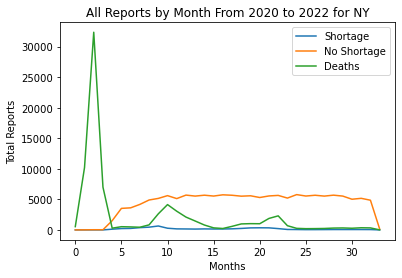

In [4]:

sum_by_month = NYData.groupby(by=['year','month']).sum()
sum_by_month = sum_by_month.reset_index()
sum_by_month

# plot ALL REPORTS for critical staffing shortage BY EACH MONTH from the dataset and save to png
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['deaths_covid'])


plt.legend(['Shortage', 'No Shortage', 'Deaths'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('All Reports by Month From 2020 to 2022 for NY')
          
        

plt.show()



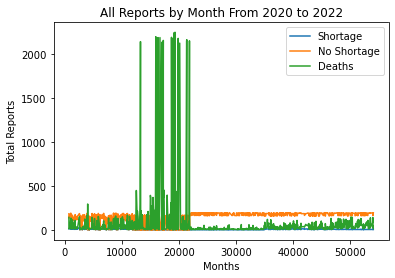

In [5]:

plt.plot(NYData['critical_staffing_shortage_today_yes'])
plt.plot(NYData['critical_staffing_shortage_today_no'])
plt.plot(NYData['deaths_covid'])

plt.legend(['Shortage', 'No Shortage', 'Deaths'])
plt.ylabel('Total Reports')
plt.xlabel('Months')

plt.title('All Reports by Month From 2020 to 2022')


plt.show()



The r-value is: 0.018550955672824672


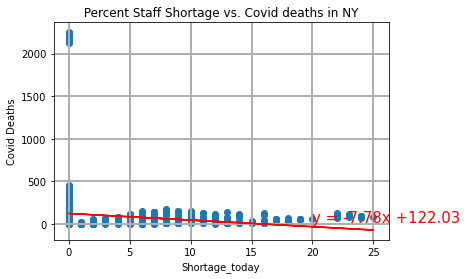

In [6]:

#create scatter plot shortage vs percent inpatient 2020
x_values = NYData['critical_staffing_shortage_today_yes']
y_values = NYData['deaths_covid']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title(" Percent Staff Shortage vs. Covid deaths in NY ")
plt.xlabel('Shortage_today')
plt.ylabel('Covid Deaths')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()




In [7]:
NYData['Last Year shortages'] = NYData.groupby('year')['critical_staffing_shortage_today_yes'].shift()

NYData

,state,date,year,month,day,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,deaths_covid,Last Year shortages
750,NY,2021/01/03,2021,01,03,13,184,142.0,NaN
753,NY,2020/10/16,2020,10,16,13,133,13.0,NaN
933,NY,2020/11/08,2020,11,08,13,158,22.0,13.0
1078,NY,2021/01/07,2021,01,07,7,191,136.0,13.0
1127,NY,2020/10/31,2020,10,31,13,152,18.0,13.0
...,...,...,...,...,...,...,...,...,...
53917,NY,2021/03/17,2021,03,17,5,194,79.0,10.0
53929,NY,2021/05/04,2021,05,04,6,164,29.0,5.0
53959,NY,2021/04/07,2021,04,07,4,191,50.0,6.0
53968,NY,2021/04/28,2021,04,28,5,190,38.0,4.0


In [8]:

#group by year and month


NYDataGrouped = NYData.groupby(["year", "month"])
NYDataGrouped = NYDataGrouped.sum()

NYDataGrouped




critical_staffing_shortage_today_yes  \
year month                                         
2020 03                                        0   
     04                                        0   
     05                                        0   
     06                                        0   
     07                                      121   
     08                                      221   
     09                                      244   
     10                                      372   
     11                                      451   
     12                                      642   
2021 01                                      277   
     02                                      170   
     03                                      156   
     04                                      138   
     05                                      165   
     06                                      147   
     07                                      150   
     08                                      179   
     09                                      242   
     10                                      333   
     11                                      348   
     12                                      338   
2022 01                                      215   
     02                                       74   
     03                                       62   
     04                                       45   
     05                                       48   
     06                                       54   
     07                                       62   
     08                                       62   
     09                                       62   
     10                                       62   
     11                                       57   
     12                                        2   

            critical_staffing_shortage_today_no  deaths_covid  \
year month                                                      
2020 03                                       0         535.0   
     04                                      10       10207.0   
     05                                      30       32359.0   
     06                                      30        6998.0   
     07                                    1514         285.0   
     08                                    3525         527.0   
     09                                    3614         491.0   
     10                                    4176         438.0   
     11                                    4897         825.0   
     12                                    5157        2633.0   
2021 01                                    5612        4146.0   
     02                                    5127        3061.0   
     03                                    5700        2102.0   
     04                                    5538        1456.0   
     05                                    5683         800.0   
     06                                    5543         334.0   
     07                                    5746         233.0   
     08                                    5673         585.0   
     09                                    5523         982.0   
     10                                    5587        1026.0   
     11                                    5305        1013.0   
     12                                    5561        1881.0   
2022 01                                    5650        2300.0   
     02                                    5211         690.0   
     03                                    5780         256.0   
     04                                    5547         205.0   
     05                                    5675         215.0   
     06                                    5536         237.0   
     07                                    5689         301.0   
     08                                    5538         323.0   
     09                                    5023         274

In [32]:
#filtering rows where the state is NY for the year 2021
NYData2021=NYData[NYData['year'].str.contains('2021')]
print(NYData2021)
         

      state        date  year month day  critical_staffing_shortage_today_yes  \
750      NY  2021/01/03  2021    01  03                                    13   
1078     NY  2021/01/07  2021    01  07                                     7   
1381     NY  2021/01/04  2021    01  04                                     9   
1848     NY  2021/01/11  2021    01  11                                     9   
2594     NY  2021/01/20  2021    01  20                                     9   
...     ...         ...   ...   ...  ..                                   ...   
53917    NY  2021/03/17  2021    03  17                                     5   
53929    NY  2021/05/04  2021    05  04                                     6   
53959    NY  2021/04/07  2021    04  07                                     4   
53968    NY  2021/04/28  2021    04  28                                     5   
53990    NY  2021/06/02  2021    06  02                                     5   

       critical_staffing_sh

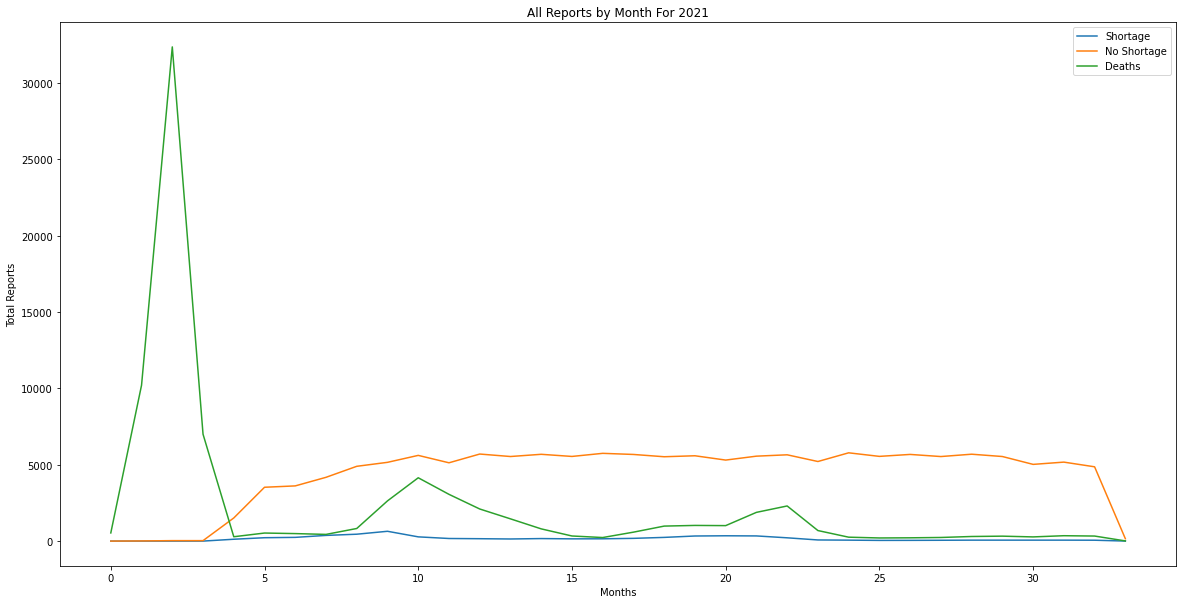

In [37]:

sum_by_month2021 = NYData2021.groupby(by=['year','month']).sum()
sum_by_month2021= sum_by_month2021.reset_index()
sum_by_month2021

# plot ALL REPORTS for critical staffing shortage BY EACH MONTH from the dataset and save to png
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['deaths_covid'])


plt.legend(['Shortage', 'No Shortage', 'Deaths'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('All Reports by Month For 2021')
          
        

plt.show()


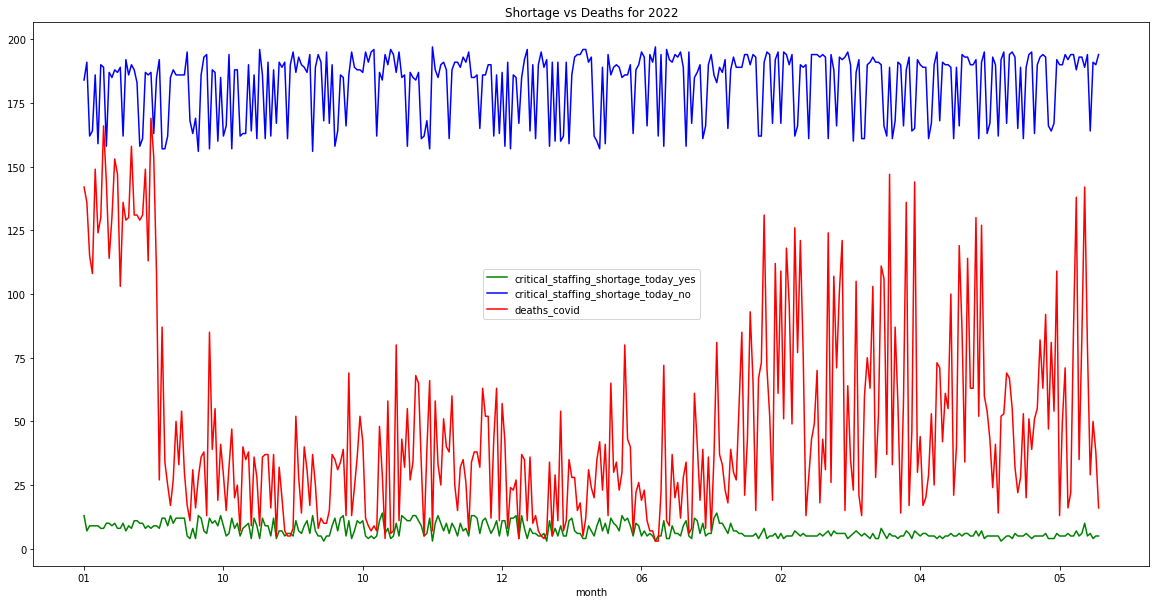

In [36]:
plt.rcParams["figure.figsize"] = [20, 10]

#Get current axis
ax = plt.gca()
  
# line plot for staff shortage
NYData2021.plot(kind = 'line',
        x = 'month',
        y = 'critical_staffing_shortage_today_yes',
        color = 'green',ax = ax)
  
# line plot for no staff shortage 
NYData2021.plot(kind = 'line',
         x = 'month',
        y = 'critical_staffing_shortage_today_no',
        color = 'blue',ax = ax)
  
# line plot for covid deaths
NYData2021.plot(kind = 'line',
         x = 'month',
        y = 'deaths_covid',
        color = 'red',ax = ax)
  
# set the title
plt.title('Shortage vs Deaths for 2022')
  
# show the plot
plt.show()

In [24]:
#Sum number of Deaths in NY
NYDeaths = NYData.loc[:,["deaths_covid"]]
print(NYDeaths.sum())

deaths_covid    78411.0
dtype: float64


In [25]:
#Sum of staff shortage repoted 
NYHspShortagesum = NYData.loc[:,["critical_staffing_shortage_today_yes"]]
print(NYHspShortagesum.sum())

critical_staffing_shortage_today_yes    5499
dtype: int64


In [26]:
#Count number of days staff shortage was repoted 
NYHspShortageCount = NYData.loc[:,["critical_staffing_shortage_today_yes"]]
print(NYHspShortageCount.count())

critical_staffing_shortage_today_yes    993
dtype: int64


In [27]:
#filtering rows where the state is TX
TXData=DeathsAnalysis[DeathsAnalysis['state'].str.contains('TX')]
print(TXData)

      state        date  year month day  critical_staffing_shortage_today_yes  \
26       TX  2020/10/14  2020    10  14                                   108   
792      TX  2020/09/10  2020    09  10                                   181   
840      TX  2020/07/30  2020    07  30                                   117   
886      TX  2020/11/25  2020    11  25                                   151   
950      TX  2020/09/03  2020    09  03                                   103   
...     ...         ...   ...   ...  ..                                   ...   
53922    TX  2021/05/27  2021    05  27                                   105   
53923    TX  2021/02/12  2021    02  12                                   128   
53925    TX  2021/01/30  2021    01  30                                   142   
53945    TX  2021/04/05  2021    04  05                                   107   
53980    TX  2021/05/29  2021    05  29                                   102   

       critical_staffing_sh

In [28]:
#Sum number of Deaths in TX 
TXDeaths = TXData.loc[:,["deaths_covid"]]
print(TXDeaths.sum())

deaths_covid    65134.0
dtype: float64


Text(0.5, 1.0, 'NY Covid mortalities vs TX Covid Mortalities')

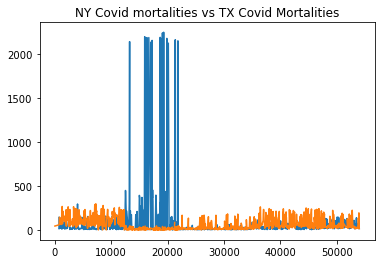

In [29]:
plt.plot(NYDeaths)
plt.plot(TXDeaths)


# Plot a bar chart
plt.plot(kind="bar")

# set the title
plt.title('NY Covid mortalities vs TX Covid Mortalities')

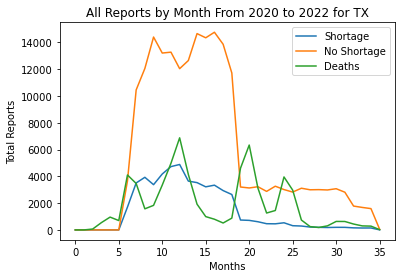

In [30]:

sum_by_monthtx = TXData.groupby(by=['year','month']).sum()
sum_by_monthtx= sum_by_monthtx.reset_index()
sum_by_monthtx

# plot ALL REPORTS for critical staffing shortage BY EACH MONTH from the dataset and save to png
plt.plot(sum_by_monthtx['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_monthtx['critical_staffing_shortage_today_no'])
plt.plot(sum_by_monthtx['deaths_covid'])


plt.legend(['Shortage', 'No Shortage', 'Deaths'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('All Reports by Month From 2020 to 2022 for TX')
          
        

plt.show()

The r-value is: nan


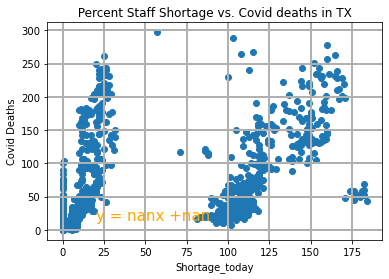

In [31]:

#create scatter plot shortage vs percent inpatient 2020
x_values = TXData['critical_staffing_shortage_today_yes']
y_values = TXData['deaths_covid']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title(" Percent Staff Shortage vs. Covid deaths in TX ")
plt.xlabel('Shortage_today')
plt.ylabel('Covid Deaths')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="orange")
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



In [18]:
#Sum of staff shortage repoted 
TxHspShortageSum = TXData.loc[:,["critical_staffing_shortage_today_yes"]]
print(TxHspShortageSum.sum())

critical_staffing_shortage_today_yes    51124
dtype: int64


In [19]:
#Count number of days staff shortage that was repoted 
TXHspShortageCount = TXData.loc[:,["critical_staffing_shortage_today_yes"]]
print(TXHspShortageCount.count())

critical_staffing_shortage_today_yes    1066
dtype: int64


In [20]:
#Print out the data for day with highest mortality 
Highest_mortality = DeathsAnalysis.loc[0, :]
Highest_mortality 

state                                           ME
date                                    2021/01/23
year                                          2021
month                                           01
day                                             23
critical_staffing_shortage_today_yes             1
critical_staffing_shortage_today_no             30
deaths_covid                                   1.0
Name: 0, dtype: object

In [21]:
#Print out the data for day with lowest mortality 
DeathsAnalysis.loc[len(DeathsAnalysis)-1, :]


state                                           PR
date                                    2021/02/12
year                                          2021
month                                           02
day                                             12
critical_staffing_shortage_today_yes             1
critical_staffing_shortage_today_no              2
deaths_covid                                  59.0
Name: 54010, dtype: object

In [22]:
# what is the average deaths for NY 
AverageDeathNY= data.groupby("state").count()
print(AverageDeathNY)

#Print(AverageDeathNY.mean())

       date  critical_staffing_shortage_today_yes  \
state                                               
AK      984                                   984   
AL     1066                                  1066   
AR     1001                                  1001   
AS      465                                   465   
AZ     1005                                  1005   
CA     1011                                  1011   
CO      993                                   993   
CT      989                                   989   
DC      979                                   979   
DE      980                                   980   
FL      995                                   995   
GA     1006                                  1006   
HI     1066                                  1066   
IA     1006                                  1006   
ID      994                                   994   
IL     1018                                  1018   
IN     1066                                  1